## Exercise 1: Neural Networks Demystified <a class="anchor" id="five"></a>

### 1.2

$$
\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}}=
-(y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}
\frac{\partial z^{(3)}}{\partial W^{(2)}}=
-(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(2)}}
$$

$$
\frac{\partial z^{(3)}}{\partial W^{(2)}}=a^{(2)}
$$


$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial W^{(1)}}
= (y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}
\frac{\partial z^{(3)}}{\partial W^{(1)}}
 = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}}
$$


$$
\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$

where:

$$z^{(2)}=XW^{(1)}$$
$$a^{(2)}=f(z^{(2)})$$
$$z^{(3)}=a^{(2)}W^{(2)}$$
$$\hat{y}=f(z^{(3)})$$



### 1.3

In [255]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [256]:
import numpy as np
from scipy import optimize


In [257]:
%pylab inline
from partSix import *

Populating the interactive namespace from numpy and matplotlib


In [258]:
NN = Neural_Network()

In [259]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
y = np.array(([75], [82], [93], [70]), dtype=float)

Text(0, 0.5, 'Test Score')

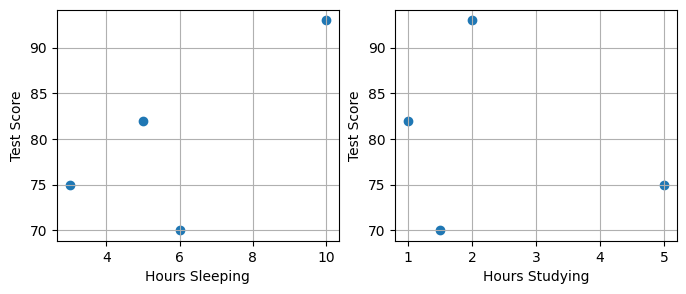

In [260]:
#Plot projections of our new data:
fig = plt.figure(0,(8,3))

plt.subplot(1,2,1)
plt.scatter(X[:,0], y)
plt.grid(1)
plt.xlabel('Hours Sleeping')
plt.ylabel('Test Score')

plt.subplot(1,2,2)
plt.scatter(X[:,1], y)
plt.grid(1)
plt.xlabel('Hours Studying')
plt.ylabel('Test Score')


In [261]:
#Normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [262]:
#Train network with new data:
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 157
         Function evaluations: 180
         Gradient evaluations: 180


Text(0, 0.5, 'Cost')

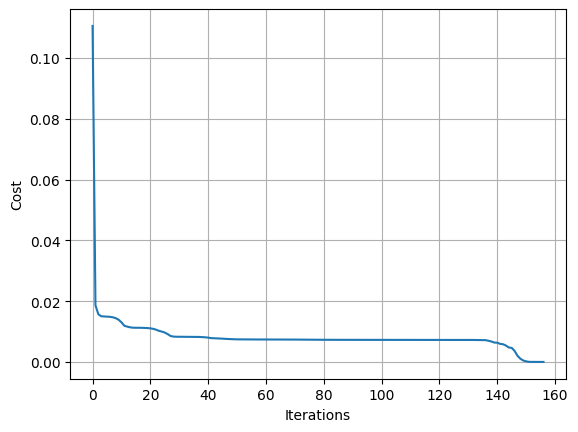

In [263]:
#Plot cost during training:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [264]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [265]:
allOutputs = NN.forward(allInputs)

Text(0, 0.5, 'Hours Study')

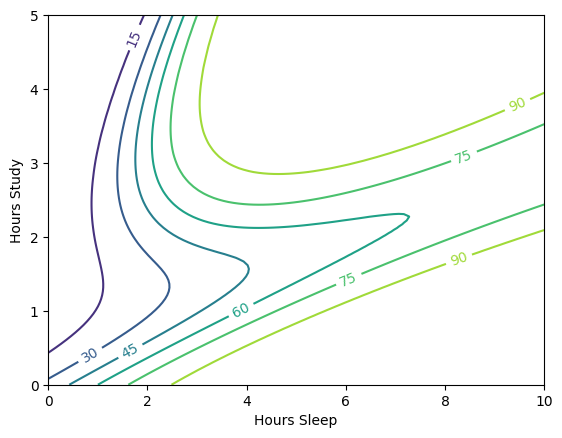

In [266]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

Text(0.5, 0, 'Test Score')

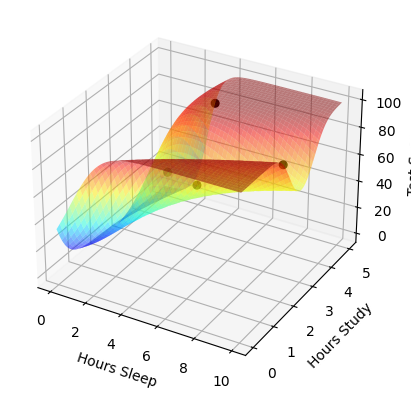

In [267]:
#3D plot:
#Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#Scatter training examples:
ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)


ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')


ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

In these two plots, we can observe strange behavior. They shows that studying more will push the results down. This is a classic case of overfitting.

In [268]:
#Training Data:
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normalize:
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(trainX, axis=0)
testY = testY/100 #Max test score is 100

In [269]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N

    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)

        return cost, grad

    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY

        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []

        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [270]:

#Train network with new data:
NN = Neural_Network()

T = trainer(NN)
T.train(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 143
         Function evaluations: 166
         Gradient evaluations: 166


Text(0, 0.5, 'Cost')

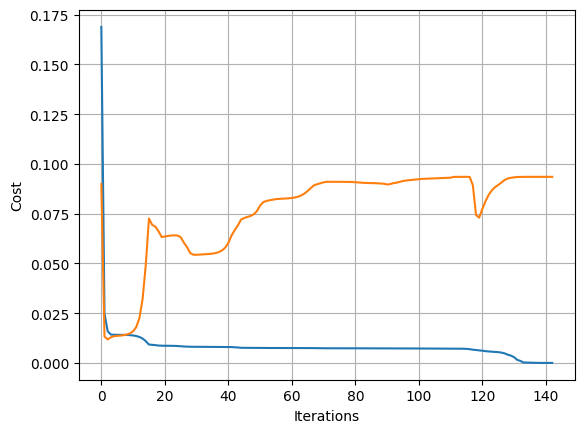

In [271]:
#Plot cost during training:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In this plot, we can identify the point where overfitting begins. Overfitting starts when the testing error (the orange curve) starts to rise while the training error (the blue curve) continues to decrease. Now we can be sure the data was overfiting.

In [272]:
#Regularization Parameter:
Lambda = 0.0001

In [273]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [274]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

        #Regularization Parameter:
        self.Lambda = Lambda

    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J

    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

        return dJdW1, dJdW2

    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params

    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [275]:
NN = Neural_Network(Lambda=0.0001)

In [276]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [277]:
#Should be less than 1e-8:
norm(grad-numgrad)/norm(grad+numgrad)

2.2811755920182173e-10

In [278]:
T = trainer(NN)
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.002733
         Iterations: 65
         Function evaluations: 68
         Gradient evaluations: 68


Text(0, 0.5, 'Cost')

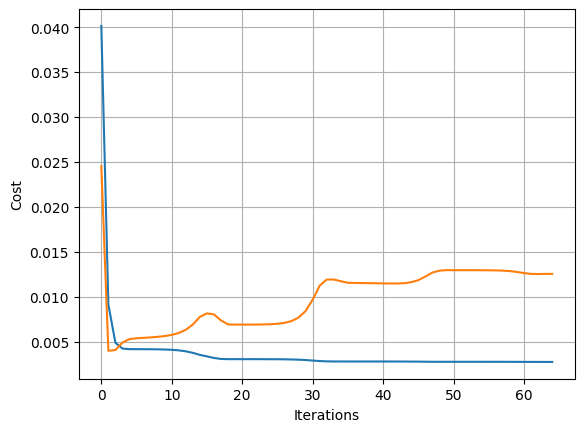

In [279]:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

We used regularization - we added a term to our cost function, now models with larger magnitude of whights costs more. In this plot we can see that the errors are much closer.

Text(0, 0.5, 'Hours Study')

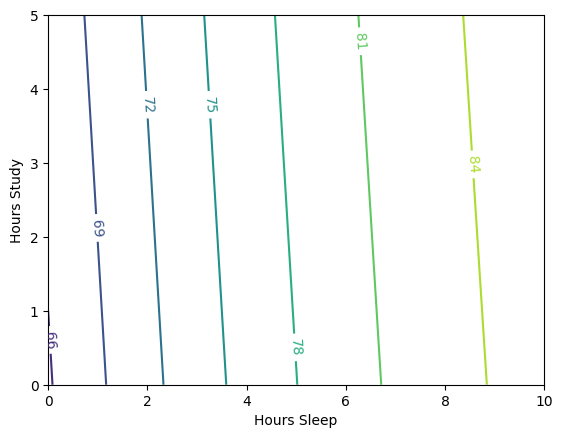

In [280]:
allOutputs = NN.forward(allInputs)

#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

Text(0.5, 0, 'Test Score')

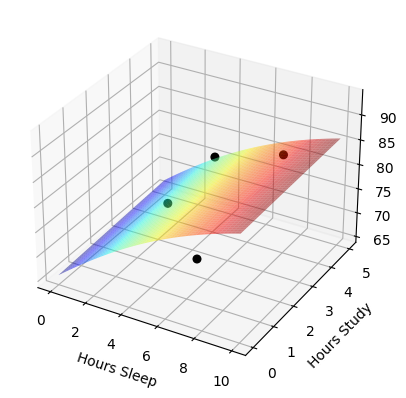

In [281]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

In the last two plots we can see that the model doesn't exactly match the data, but the fit is still good.

## Exercise 2: The TensorFlow Playground <a class="anchor" id="five"></a>

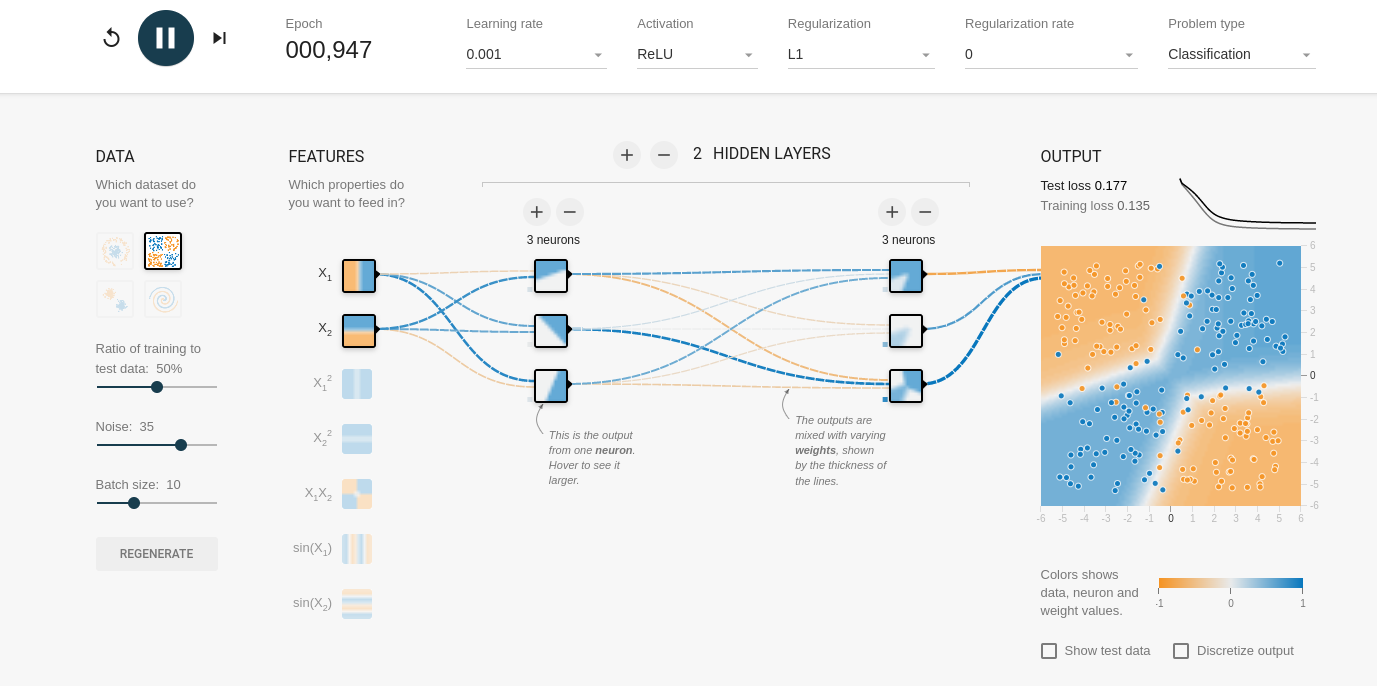

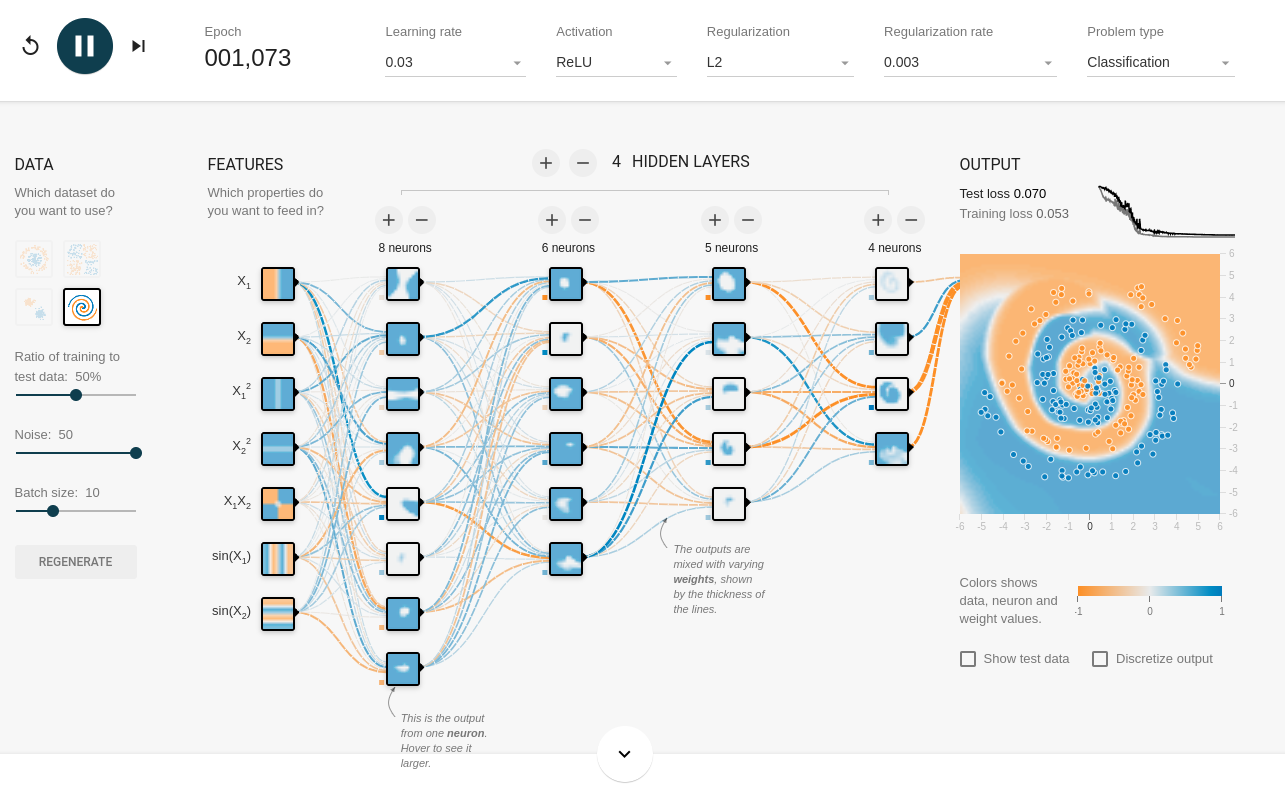

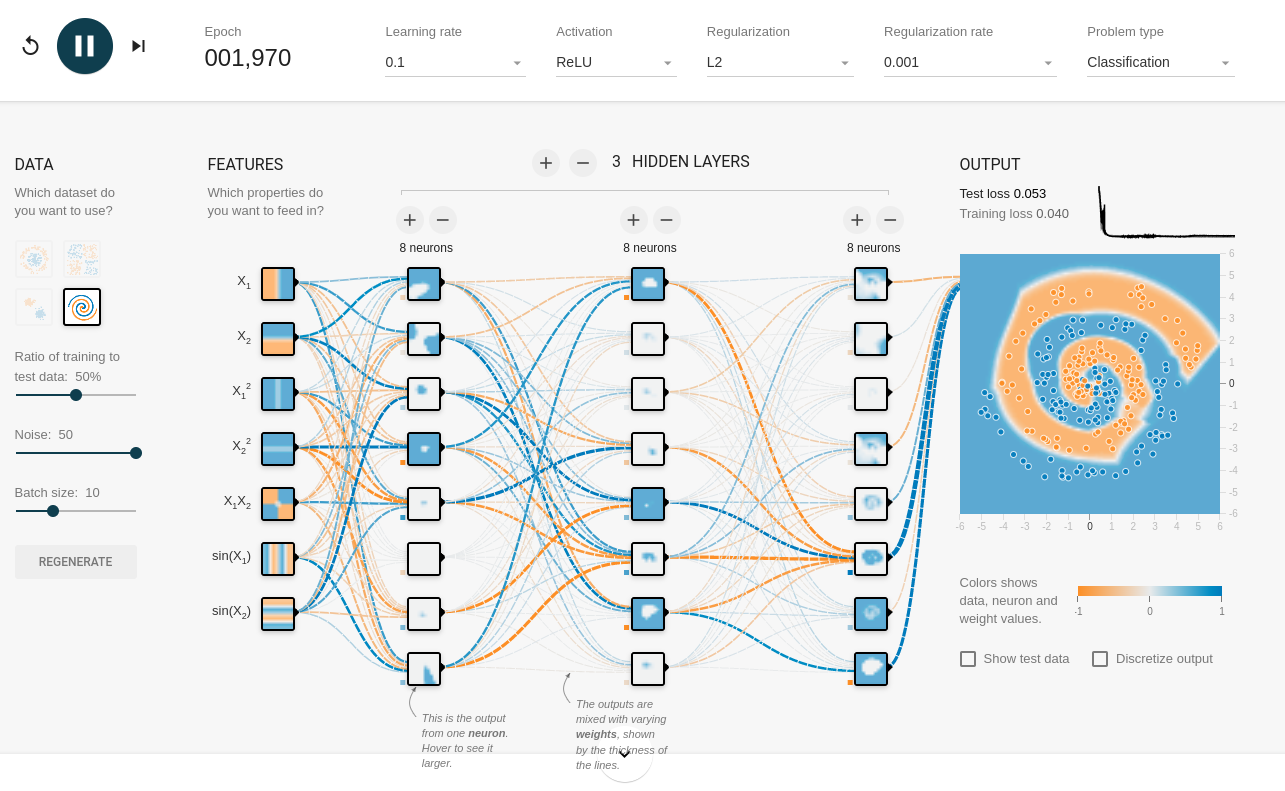

## Exercise 3: Galaxies vs. Quasars (again)

### 3.1

In [282]:
import numpy as np
import pylab as plt

In [283]:
data=np.genfromtxt('galaxyquasar.csv', delimiter=',',names=True,usecols=(0,1,2,3,4,6),dtype=float,comments='#')
names = data.dtype.names
print(names)
data=np.genfromtxt('galaxyquasar.csv', delimiter=',',skip_header=1,usecols=(0,1,2,3,4,6),dtype=float)
d = dict(zip(names, data.T))
lab=np.genfromtxt('galaxyquasar.csv', delimiter=',',skip_header=1,usecols=5,dtype=str)
print(lab)
for diff in ['ug', 'gr', 'ri', 'iz']:
    d[diff]=d[diff[0]]-d[diff[1]]
d['lab']=lab
d.keys()

('u', 'g', 'r', 'i', 'z', 'z1')
['QSO' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


dict_keys(['u', 'g', 'r', 'i', 'z', 'z1', 'ug', 'gr', 'ri', 'iz', 'lab'])

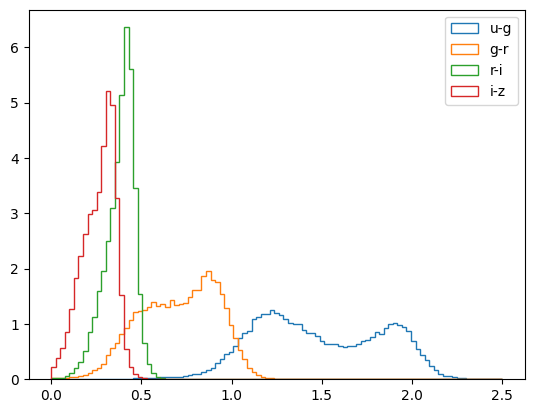

In [284]:
_ = plt.hist(d['ug'][lab=='GALAXY'],bins=np.linspace(0,2.5,100),histtype='step',density=True,label='u-g')
_ = plt.hist(d['gr'][lab=='GALAXY'],bins=np.linspace(0,2.5,100),histtype='step',density=True,label='g-r')
_ = plt.hist(d['ri'][lab=='GALAXY'],bins=np.linspace(0,2.5,100),histtype='step',density=True,label='r-i')
_ = plt.hist(d['iz'][lab=='GALAXY'],bins=np.linspace(0,2.5,100),histtype='step',density=True,label='i-z')
plt.legend()

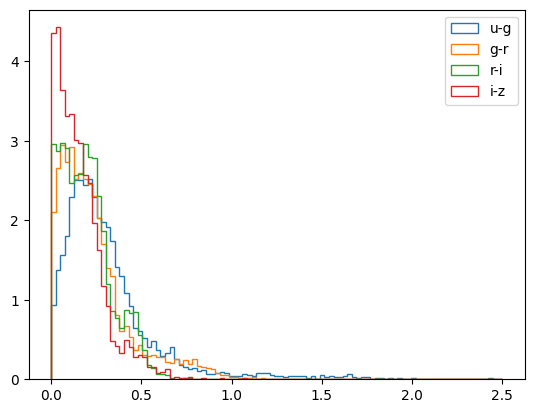

In [285]:
_ = plt.hist(d['ug'][lab=='QSO'],bins=np.linspace(0,2.5,100),histtype='step',density=True,label='u-g')
_ = plt.hist(d['gr'][lab=='QSO'],bins=np.linspace(0,2.5,100),histtype='step',density=True,label='g-r')
_ = plt.hist(d['ri'][lab=='QSO'],bins=np.linspace(0,2.5,100),histtype='step',density=True,label='r-i')
_ = plt.hist(d['iz'][lab=='QSO'],bins=np.linspace(0,2.5,100),histtype='step',density=True,label='i-z')
plt.legend()

In [286]:
!pip install astro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
  Created wheel for astro: filename=astro-0.2.7-py2.py3-none-any.whl size=84822 sha256=b7666b8d67c873503baa26dc4aedec26908bf037d19b96819ce786dc80565539
  Stored in directory: /root/.cache/pip/wheels/94/6c/82/515e2783c4cb425c55c4cdcf37d230c10b89c6e27d93c765e0
  Created wheel for logbook: filename=Logbook-1.5.3-cp310-cp310-linux_x86_64.whl 

In [287]:
import sklearn.model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from astroML.classification import GMMBayes
from sklearn.neighbors import KNeighborsClassifier

In [288]:
X=np.array([d['ug'], d['gr'], d['ri'], d['iz']]).T
y = np.array(lab=='QSO',dtype=int)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [289]:
!pip install Tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import datetime

# Define the model architecture
clf = keras.Sequential([
    layers.Dense(5, activation='relu'),
    layers.Dense(2, activation='softmax')])

# Compile the model with Adam optimizer and custom learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
clf.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with cross-validation using TensorBoard callback
history = clf.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])

# Evaluate the model on the test data
test_loss, test_acc = clf.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 4s 3ms/step - loss: 0.3838 - accuracy: 0.7973 - val_loss: 0.2422 - val_accuracy: 0.8741


In [ ]:
# Generate predictions on the test data
y_pred_probs = clf.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Compute the false positive rate (FPR), true positive rate (TPR), and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

In [ ]:

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.ylim([0.9,1])
plt.xlim([0,0.2])
plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Define the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='adam', learning_rate_init=0.001)

# Train the model
clf.fit(X_train, y_train)

# Generate predictions on the test data
y_pred_probs = clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute the false positive rate (FPR), true positive rate (TPR), and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)



In [ ]:

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.ylim([0.9,1])
plt.xlim([0,0.2])
plt.grid()
plt.show()

Lets try two hidden layer with 5 neurons each, it's better then 3 hidden layers. There are 5 activation: identity, logistic, tanh and relu. After trying all of them it seems like the best for this problem is tanh.
L liked more sklearn tools, they easeir and faster.

In [ ]:
# Define the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', solver='adam', learning_rate_init=0.001)

# Train the model
clf.fit(X_train, y_train)

# Generate predictions on the test data
y_pred_probs = clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute the false positive rate (FPR), true positive rate (TPR), and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

In [ ]:

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.ylim([0.9,1])
plt.xlim([0,0.2])
plt.grid()
plt.show()